[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/SubhadityaMukherjee/openml_docs/HEAD?labpath=Scikit-learn%2Fdatasets_tutorial)

<a target="_blank" href="https://colab.research.google.com/github/SubhadityaMukherjee/openml_docs/blob/master/docs/Scikit-learn/datasets_tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Datasets

How to list and download datasets.


In [1]:
# License: BSD 3-Clauses

import openml
import pandas as pd
from openml.datasets import edit_dataset, fork_dataset, get_dataset

## Exercise 0

* List datasets

  * Use the output_format parameter to select output type
  * Default gives 'dict' (other option: 'dataframe', see below)

Note: list_datasets will return a pandas dataframe by default from 0.15. When using
openml-python 0.14, `list_datasets` will warn you to use output_format='dataframe'.



In [2]:
datalist = openml.datasets.list_datasets(output_format="dataframe")
datalist = datalist[["did", "name", "NumberOfInstances", "NumberOfFeatures", "NumberOfClasses"]]

print(f"First 10 of {len(datalist)} datasets...")
datalist.head(n=10)

# The same can be done with lesser lines of code
openml_df = openml.datasets.list_datasets(output_format="dataframe")
openml_df.head(n=10)

First 10 of 5456 datasets...


,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
2,2,anneal,1,1,active,ARFF,684.0,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0
3,3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
5,5,arrhythmia,1,1,active,ARFF,245.0,13.0,2.0,13.0,280.0,452.0,384.0,408.0,206.0,74.0
6,6,letter,1,1,active,ARFF,813.0,26.0,734.0,26.0,17.0,20000.0,0.0,0.0,16.0,1.0
7,7,audiology,1,1,active,ARFF,57.0,24.0,1.0,24.0,70.0,226.0,222.0,317.0,0.0,70.0
8,8,liver-disorders,1,1,active,ARFF,NaN,NaN,NaN,0.0,6.0,345.0,0.0,0.0,6.0,0.0
9,9,autos,1,1,active,ARFF,67.0,22.0,3.0,6.0,26.0,205.0,46.0,59.0,15.0,11.0
10,10,lymph,1,1,active,ARFF,81.0,8.0,2.0,4.0,19.0,148.0,0.0,0.0,3.0,16.0
11,11,balance-scale,1,1,active,ARFF,288.0,3.0,49.0,3.0,5.0,625.0,0.0,0.0,4.0,1.0


## Exercise 1

* Find datasets with more than 10000 examples.
* Find a dataset called 'eeg_eye_state'.
* Find all datasets with more than 50 classes.



In [3]:
datalist[datalist.NumberOfInstances > 10000].sort_values(["NumberOfInstances"]).head(n=20)
""
datalist.query('name == "eeg-eye-state"')
""
datalist.query("NumberOfClasses > 50")

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1491,1491,one-hundred-plants-margin,1600.0,65.0,100.0
1492,1492,one-hundred-plants-shape,1600.0,65.0,100.0
1493,1493,one-hundred-plants-texture,1599.0,65.0,100.0
4552,4552,BachChoralHarmony,5665.0,17.0,102.0
41167,41167,dionis,416188.0,61.0,355.0
41169,41169,helena,65196.0,28.0,100.0
41960,41960,seattlecrime6,523590.0,8.0,144.0
41983,41983,CIFAR-100,60000.0,3073.0,100.0
42078,42078,beer_reviews,1586614.0,13.0,104.0
42087,42087,beer_reviews,1586614.0,13.0,104.0


### Download datasets



In [4]:
# This is done based on the dataset ID.
dataset = openml.datasets.get_dataset(1471)

# Print a summary
print(
    f"This is dataset '{dataset.name}', the target feature is "
    f"'{dataset.default_target_attribute}'"
)
print(f"URL: {dataset.url}")
print(dataset.description[:500])

/var/folders/h6/wl98bxd12mx33r4cb4px3h640000gn/T/ipykernel_4746/1689367558.py:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(1471)


This is dataset 'eeg-eye-state', the target feature is 'Class'
URL: https://api.openml.org/data/v1/download/1587924/eeg-eye-state.arff
**Author**: Oliver Roesler  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after


Get the actual data.

openml-python returns data as pandas dataframes (stored in the `eeg` variable below),
and also some additional metadata that we don't care about right now.



In [5]:
eeg, *_ = dataset.get_data()

You can optionally choose to have openml separate out a column from the
dataset. In particular, many datasets for supervised problems have a set
`default_target_attribute` which may help identify the target variable.



In [6]:
X, y, categorical_indicator, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute
)
print(X.head())
print(X.info())

        V1       V2       V3       V4       V5       V6       V7       V8  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        V9      V10      V11      V12      V13      V14  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V

Sometimes you only need access to a dataset's metadata.
In those cases, you can download the dataset without downloading the
data file. The dataset object can be used as normal.
Whenever you use any functionality that requires the data,
such as `get_data`, the data will be downloaded.
Starting from 0.15, not downloading data will be the default behavior instead.
The data will be downloading automatically when you try to access it through
openml objects, e.g., using `dataset.features`.



In [7]:
dataset = openml.datasets.get_dataset(1471, download_data=False)

/var/folders/h6/wl98bxd12mx33r4cb4px3h640000gn/T/ipykernel_4746/2608535001.py:1: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(1471, download_data=False)


## Exercise 2
* Explore the data visually.



/Users/eragon/.pyenv/versions/3.9.19/envs/openml/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:96: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


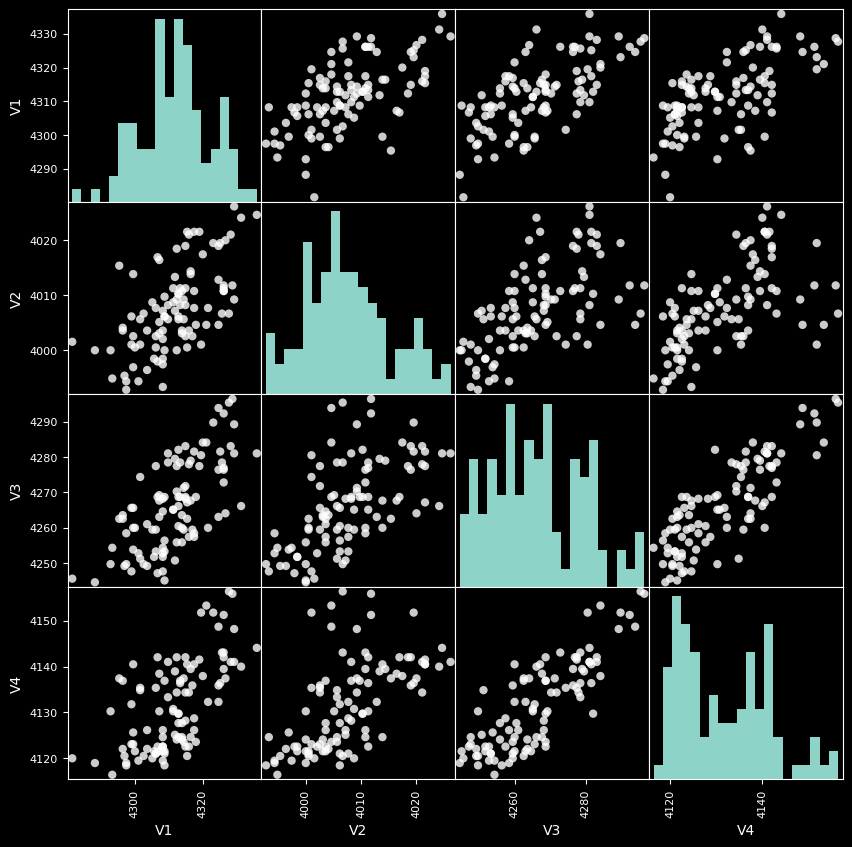

In [8]:
eegs = eeg.sample(n=1000)
_ = pd.plotting.scatter_matrix(
    X.iloc[:100, :4],
    c=y[:100],
    figsize=(10, 10),
    marker="o",
    hist_kwds={"bins": 20},
    alpha=0.8,
    cmap="plasma",
)

### Edit a created dataset
This example uses the test server, to avoid editing a dataset on the main server.

<div class="alert alert-danger"><h4>Warning</h4><p>.. include:: ../../test_server_usage_warning.txt</p></div>



In [ ]:
openml.config.start_using_configuration_for_example()

Edit non-critical fields, allowed for all authorized users:
description, creator, contributor, collection_date, language, citation,
original_data_url, paper_url



In [ ]:
desc = (
    "This data sets consists of 3 different types of irises' "
    "(Setosa, Versicolour, and Virginica) petal and sepal length,"
    " stored in a 150x4 numpy.ndarray"
)
did = 128
data_id = edit_dataset(
    did,
    description=desc,
    creator="R.A.Fisher",
    collection_date="1937",
    citation="The use of multiple measurements in taxonomic problems",
    language="English",
)
edited_dataset = get_dataset(data_id)
print(f"Edited dataset ID: {data_id}")

Editing critical fields (default_target_attribute, row_id_attribute, ignore_attribute) is allowed
only for the dataset owner. Further, critical fields cannot be edited if the dataset has any
tasks associated with it. To edit critical fields of a dataset (without tasks) owned by you,
configure the API key:
openml.config.apikey = 'FILL_IN_OPENML_API_KEY'
This example here only shows a failure when trying to work on a dataset not owned by you:



In [ ]:
try:
    data_id = edit_dataset(1, default_target_attribute="shape")
except openml.exceptions.OpenMLServerException as e:
    print(e)

### Fork dataset
Used to create a copy of the dataset with you as the owner.
Use this API only if you are unable to edit the critical fields (default_target_attribute,
ignore_attribute, row_id_attribute) of a dataset through the edit_dataset API.
After the dataset is forked, you can edit the new version of the dataset using edit_dataset.



In [ ]:
data_id = fork_dataset(1)
print(data_id)
data_id = edit_dataset(data_id, default_target_attribute="shape")
print(f"Forked dataset ID: {data_id}")

openml.config.stop_using_configuration_for_example()